In [2]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Epidemiology Model 


# Data 
- 1. COVID-19 US cases: Directly read data from JHU github repo.
- 2. Mobility Data provided by Apple for each county in the U.S.


In [32]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_confirmed_df = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
us_death_df = pd.read_csv(url, error_bad_lines=False)

display(us_confirmed_df.head())
display(us_death_df.head())

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
global_recover_df = pd.read_csv(url, error_bad_lines=False)
display(global_recover_df.head())


url = "https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-m50.csv"
mobility = pd.read_csv(url, error_bad_lines=False)
display(mobility.head())
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,36,37,37,39,39,39,39,39,39,41
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,84,84,84,84,84,98
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,10,10,10,10,10,10,10,10
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,18,18,18,17,17,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,34,34,35,35,35,36,36,36,36,39


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35137,35160,35295,35350,35370,35422,35934,35976,36122,36145
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,13453,13804,14216,14565,15055,15469,15842,16230,16666,17031
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45148,45148,46326,46962,47581,48183,48794,49421,50070,50712
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4830,4965,5055,5127,5239,5290,5358,5405,5503,5542
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6523,6582,6623,7062,7117,7273,7346,7351,7444,7517


,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,...,9.730,6.958,8.688,9.370,10.306,10.695,11.892,9.853,7.514,9.253
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,...,9.087,5.939,9.618,12.572,13.906,14.860,15.327,10.046,6.858,11.082
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,...,9.654,8.621,9.285,9.494,10.732,11.266,12.166,9.895,7.953,9.729
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,...,9.815,7.011,8.324,8.062,9.422,9.681,13.157,9.128,7.325,8.762
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,...,16.113,10.162,15.468,16.844,17.496,17.328,26.392,16.463,10.120,16.685


In [33]:
us_confirmed_df.loc[~us_confirmed_df["FIPS"].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,84056037,US,USA,840,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,...,1110,1151,1224,1269,1353,1378,1421,1548,1563,1598
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,760,796,835,869,894,901,920,950,982,1016
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,227,253,263,274,290,298,315,325,339,395


# Key variables of Epidemiology Model
- I, the number of infected, is in the `us_comfirmed`
- S, susceptible to COVID-19, is in `us_population` - `us_confirmed`, denoted as `us_susceptible`
- R, removed, is the sum of recovered and deceased. 
- N, population

## Parameters
- Beta: the infection rate
- D: number of days a patient can stay infected

## Goal
- With existing knowledge of I,S,R,and N, use gradient descent to figure out $\theta$ = ($\beta$, D)

In [34]:
# Data Preparation
us_confirmed = us_confirmed_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
us_death = us_death_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
us_recovered = global_recover_df.loc[global_recover_df["Country/Region"] == "US"].drop(
    ["Province/State","Country/Region","Lat","Long"],axis= 1).values[0]
#us_removed = us_recovered+us_death
us_removed = us_recovered+us_death
#us_population = us_death_df.Population.sum()
us_population = 1e7
us_infected = us_confirmed 
us_susceptible = us_population - us_infected

#test data
us_removed = us_removed[0:100]
us_susceptible = us_susceptible[0:100]
us_infected = us_infected[0:100]

## Gradient Descent to solve for $\beta$ and $\frac{1}{D}$

Given: 
$\begin{align*}
  &\xi = \frac{1}{D} \\
  &f_s(I_n,N,S_n) = -\beta\left(\frac{I_n}{N}\right) S_n, \\
  &f_I(I_n,N,S_n) = - I\xi + \beta\left(\frac{I_n}{N}\right) S_n,  \\
  &f_R(I_n) = I_n\xi, \\
  &h=1
\end{align*}
$

Plug the above values into
$\frac{1}{N} \sum_{n=1}^N \nabla_{\theta} \left( \left({\frac{s(n+1)-s(n)}{h} - f_s(s(n), I(n), R(n);\theta)}\right)^2
+ \left({\frac{I(n+1)-I(n)}{h} - f_I(s(n), I(n), R(n;\theta)}\right)^2 + \dots \right)$

To calculate the above the term, we need to use __chain rule__ to differentiate with respect to $\beta$ and $\xi$

$\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$



## Tuning
First initialize $\theta$ at $\beta = 0.2 $ and $\xi = 0.1$


Then, at each iteration update $\beta$ and $\xi$ according to the rules below


$\beta_{k+1} = \beta_k - h_G \partial_\beta L(\theta|s(1),\dots,s(N)),$


$
\xi_{k+1} = \xi_k - h_G \partial_\xi L(\theta|s(1),\dots,s(N)).$
 where $h_G = 0.001$
 

0.22506571898726158
198.98643140963043


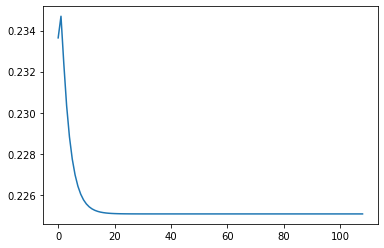

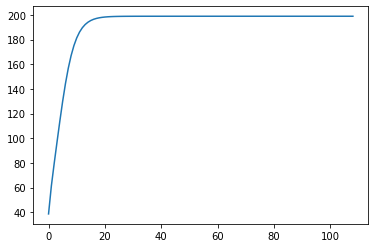

In [35]:
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]
def calculate_gradient(s,i,r,population,beta,epsilon):
    result1 = 0 #continue adding to solve for beta
    result2 = 0 #continue adding to solve for 1/D aka epsilon
    for n in range(len(s)-1):
        result1 += 2*(s[n+1]-s[n]+beta*s[n]*(i[n]/population))*(s[n]*i[n]/population)
        result1 += 2*(i[n+1]-i[n]-beta*s[n]*(i[n]/population) + i[n]*epsilon)*(-s[n]*i[n]/population)
        
        result2 += 2*(i[n+1]-i[n]+i[n]*epsilon-beta*i[n]*s[n]/population)*(i[n])
        result2 += 2*(r[n+1]-r[n]-i[n]*epsilon)*(-i[n])
        
    return result1,result2
def calculate(s,i,r,population,learning_rate1,learning_rate2):
    beta = 0.2
    epsilon = 1/14
    
    loss = 0
    length = len(s)
    betas = []
    ds = []
    
    for itera in range(1000): # do it for 10 iterations.
        
        loss1,loss2 = calculate_gradient(s,i,r,population,beta,epsilon)
        beta_new = beta - learning_rate1* loss1/length #0.001 is the learning rate
        epsilon_new = epsilon - learning_rate2 * loss2/length
        if (beta_new == beta) & (epsilon_new == epsilon):
            print(beta_new)
            print(1/epsilon_new)
            break
        beta = beta_new
        epsilon = epsilon_new
        betas.append(beta)
        ds.append(1/epsilon)

    return betas,ds

def get_county(start,days,county_code = 1001):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.FIPS == county_code].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.FIPS == county_code].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.FIPS ==county_code].Population.sum()
    county_infected = county_confirmed
    county_removed = county_death
    county_susceptible = county_population - county_infected
    return county_susceptible[start:days+start],county_infected[start:start+days],county_removed[start:start+days],county_population
def get_state(start,days,state_name = "Washington"):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.Province_State == state_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.Province_State == state_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.Province_State ==state_name].Population.sum()
    county_infected = county_confirmed
    county_removed = county_death
    county_susceptible = county_population - county_infected
    return county_susceptible[start:start + days],county_infected[start:start + days],county_removed[start:days+start],county_population
def get_country(start,days,country_name = "US"):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.Country_Region == country_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.Country_Region == country_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.Country_Region ==country_name].Population.sum()
    country_recovered = global_recover_df.loc[global_recover_df["Country/Region"] == country_name].drop(
    ["Province/State","Country/Region","Lat","Long"],axis= 1).values[0]
    county_infected = county_confirmed
    county_removed = county_death + country_recovered
    county_susceptible = county_population - county_infected
    return county_susceptible[start:start+days],county_infected[start:start+days],county_removed[start:start+days],county_population

if __name__ == "__main__":
    county_code = 1005
    
    #s,i,r,p = get_county(70,1003)
    #s,i,r,p = get_state(20,40,"Washington")
    s,i,r,p = get_country(30,37)    
    learning_rate1 = 1e-3/p*60
    learning_rate2= 1e-3/p*60
    betas,ds = calculate(s,i,r,p,learning_rate1,learning_rate2)
    plt.plot(betas)
    plt.show()
    plt.plot(ds)
    plt.show()

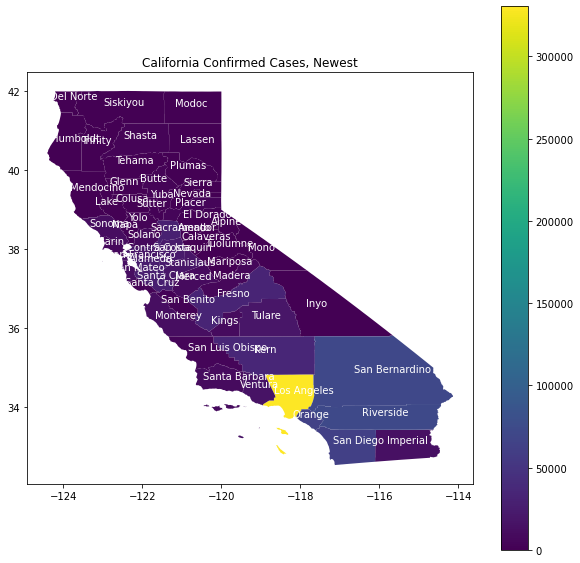

In [168]:
import geopandas

us = geopandas.read_file("/home/caw062/template/data/county_boundary/cb_2018_us_county_500k.shp")
us_confirmed_df["GEOID"] = us_confirmed_df["UID"].apply(lambda x:str(x)[3:])
merged = us_confirmed_df.merge(us,on="GEOID",how="left")
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])
map1 = gdf.loc[gdf["Province_State"] == "California"].plot(column = "11/12/20",
                                                    figsize = (10,10),legend = True)
centers = gdf.centroid
points_gdf = gdf.copy()
points_gdf["geometry"] = centers
ca_points = points_gdf.loc[points_gdf["Province_State"] == "California"]
plt.title("California Confirmed Cases, Newest")
for x, y, label in zip(ca_points.geometry.x, ca_points.geometry.y, ca_points["Admin2"]):
    map1.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

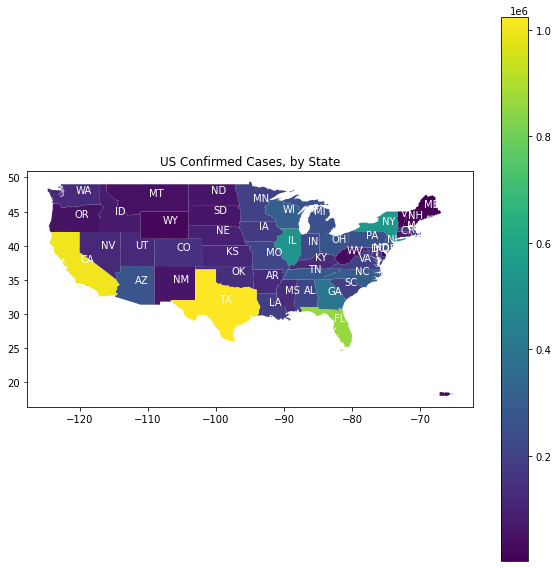

In [200]:
import geopandas
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Long_ < -50]
states = geopandas.read_file("/home/caw062/template/data/state_boundary/cb_2018_us_state_500k.shp")
us_confirmed_df["STATEFP"] = us_confirmed_df["UID"].apply(lambda x:str(x)[3:5])
us_confirmed_df_by_state = us_confirmed_df.groupby("STATEFP").agg({"11/12/20":"sum"})
merged = us_confirmed_df_by_state.merge(states,on="STATEFP",how="left").dropna()
merged = merged.loc[~merged["STUSPS"].isin(["HI","AK"])]
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])

centers = gdf.centroid
points_gdf = gdf.copy()
points_gdf["geometry"] = centers

map1 = gdf.plot(column = "11/12/20",figsize = (10,10),legend = True)
plt.title("US Confirmed Cases, by State")
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf["STUSPS"]):
    map1.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

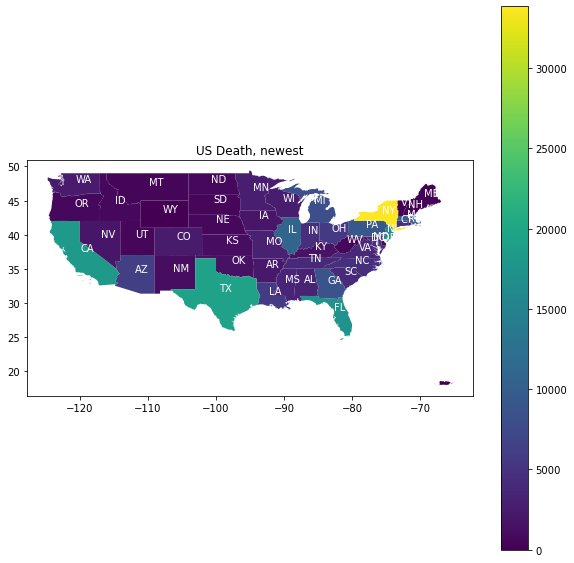

In [203]:
import geopandas
us_death_df = us_death_df.loc[us_death_df.Long_ < -50]
states = geopandas.read_file("/home/caw062/template/data/state_boundary/cb_2018_us_state_500k.shp")
us_death_df["STATEFP"] = us_death_df["UID"].apply(lambda x:str(x)[3:5])
us_death_df_by_state = us_death_df.groupby("STATEFP").agg({"11/12/20":"sum"})
merged = us_death_df_by_state.merge(states,on="STATEFP",how="left").dropna()
merged = merged.loc[~merged["STUSPS"].isin(["HI","AK"])]
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])
map3 = gdf.plot(column = "11/12/20",figsize = (10,10),legend = True)
plt.title("US Death, newest")
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf["STUSPS"]):
    map3.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

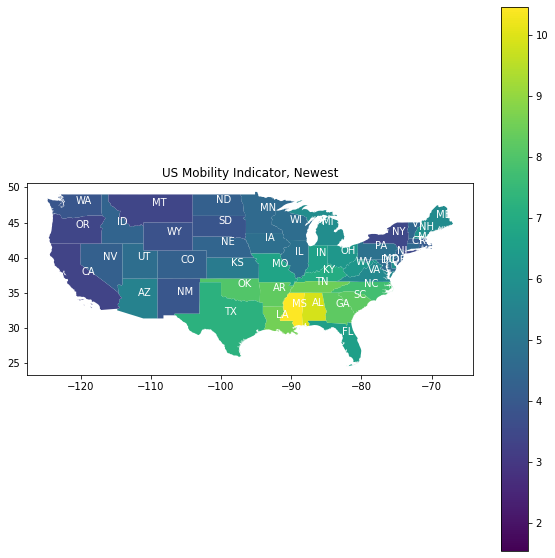

In [225]:
states = geopandas.read_file("/home/caw062/template/data/state_boundary/cb_2018_us_state_500k.shp")
mobility_by_state = mobility.loc[mobility.admin_level == 1].rename({"admin1":"NAME"},axis = 1)

merged = mobility_by_state.merge(states,on="NAME",how="left")
merged = merged.loc[~merged["STUSPS"].isin(["HI","AK"])]
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])
map4 = gdf.plot(column = "2020-11-10",figsize = (10,10),legend = True)
plt.title("US Mobility Indicator, Newest")
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf["STUSPS"]):
    map4.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

[658]
[658, 189]
[658, 189, 1112]
[658, 189, 1112, 1403]
[658, 189, 1112, 1403, 3013]


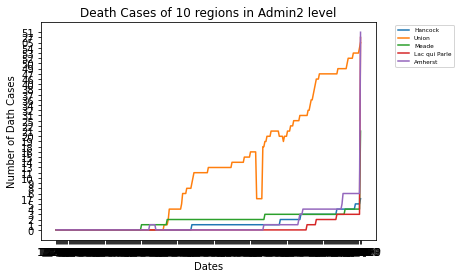

<Figure size 1440x1080 with 0 Axes>

In [235]:
import numpy as np
import scipy.linalg as la
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import random
fontP = FontProperties()
fontP.set_size('xx-small')

def death_multi_plot(n, df, level, start_date= '1/22/20'):
    '''
    n: number of regions
    df: Dataframe of death cases
    level: region level: admin2/ province/ state
    '''
    randomlist = []
    for i in range(0,n):
        n = random.randint(0,df.shape[0])
        randomlist.append(n)
        print(randomlist)
    for j in randomlist:
        target_j = df.loc[j,:]
        targetj_dth_info= target_j[start_date:]
        target_region = str(target_j[level])
        yj= list (targetj_dth_info)
        xj = list (targetj_dth_info.index)
        plt.plot(xj, yj, label=target_region)
    plt.xlabel('Dates')
    plt.ylabel('Number of Dath Cases')
    plt.title('Death Cases of 10 regions in '+ level+ ' level')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    plt.figure(figsize=[20,15])
    plt.show()
    return
death_multi_plot(5,us_death_df,"Province")

In [206]:
import nbformat as nbf

nb = nbf.v4.new_notebook()
text = """\
# My first automatic Jupyter Notebook
This is an auto-generated notebook."""

code = """\
%pylab inline
hist(normal(size=2000), bins=50);
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_confirmed_df = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
us_death_df = pd.read_csv(url, error_bad_lines=False)

display(us_confirmed_df.head())
display(us_death_df.head())

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
global_recover_df = pd.read_csv(url, error_bad_lines=False)
display(global_recover_df.head())


url = "https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-m50.csv"
mobility = pd.read_csv(url, error_bad_lines=False)
display(mobility.head())
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]

"""

nb['cells'] = [nbf.v4.new_markdown_cell(text),
               nbf.v4.new_code_cell(code)]
fname = 'test.ipynb'

with open(fname, 'w') as f:
    nbf.write(nb, f)

In [148]:
ca = points_gdf.loc[points_gdf.Province_State == "California"]

In [10]:
! pip install arcpy


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement arcpy (from versions: none)
ERROR: No matching distribution found for arcpy


In [13]:
# find out neighbors
from arcgis import *
gis1=GIS()
gis = GIS("https://ucsdonline.maps.arcgis.com/home/item.html?id=c74bf4d93f514f0296c1ffd6dda71a73", client_id='S9hCtNsAKhoTpS87')
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest//oauth2/authorize?response_type=code&client_id=S9hCtNsAKhoTpS87&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=O5PYA4e3BFdVKb9ypL4nDVwecCJtjC
Enter code obtained on signing in using SAML: ········


/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'web.ucsd.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Successfully logged in as: shw276_UCSDOnline


In [14]:
# USA COUNTIES: https://www.arcgis.com/home/item.html?id=7566e0221e5646f99ea249a197116605
counties_ = gis.content.get('7566e0221e5646f99ea249a197116605')
counties = counties_.layers[0].query().sdf


In [150]:
def get_neighbors(code,nbr):  
    fips = list(nbr.FIPS)
    for i in range(len(fips)):
        if not fids[i]>0:
            fips[i]=fips[i-1]
    nbr['FIPS']=fips
    idx = []
    for i in range(nbr.shape[0]):
        center = nbr.loc[i,'FIPS'] 
        nearby = nbr.loc[i,'N-FIPS']
        if center == nearby:
            idx.append(i)
    nbr = nbr.drop(idx)
    nbr=nbr.reset_index(drop=True)
    dic = {}
    keys = nbr.FIPS
    values=nbr['N-FIPS']
    res = defaultdict(list) 
    for i, j in zip(keys, values): 
        res[i].append(j)
    print(res)
    return res[code]
df = pd.read_csv('county_adjacency.txt', sep= '\t',encoding= 'unicode_escape', names =['Center','FIPS','NBR','N-FIPS'])
get_neighbors(1001,df)

defaultdict(<class 'list'>, {1001.0: [1021, 1047, 1051, 1085, 1101], 1003.0: [1025, 1053, 1097, 1099, 1129, 12033], 1005.0: [1011, 1045, 1067, 1109, 1113, 13061, 13239, 13259], 1007.0: [1021, 1065, 1073, 1105, 1117, 1125], 1009.0: [1043, 1055, 1073, 1095, 1115, 1127], 1011.0: [1005, 1087, 1101, 1109, 1113], 1013.0: [1035, 1039, 1041, 1085, 1099, 1131], 1015.0: [1019, 1029, 1055, 1115, 1121], 1017.0: [1081, 1111, 1123, 13145, 13285], 1019.0: [1015, 1029, 1049, 1055, 13055, 13115, 13233], 1021.0: [1001, 1007, 1037, 1047, 1051, 1105, 1117], 1023.0: [1025, 1091, 1119, 1129, 28023, 28075, 28153], 1025.0: [1003, 1023, 1091, 1099, 1129, 1131], 1027.0: [1029, 1037, 1111, 1121, 1123], 1029.0: [1015, 1019, 1027, 1111, 1121, 13045, 13143, 13233], 1031.0: [1039, 1041, 1045, 1061, 1109], 1033.0: [1059, 1077, 1079, 28141], 1035.0: [1013, 1039, 1053, 1099], 1037.0: [1021, 1027, 1051, 1117, 1121, 1123], 1039.0: [1013, 1031, 1035, 1041, 1053, 1061, 12091, 12131], 1041.0: [1013, 1031, 1039, 1085, 1101, 

[1021, 1047, 1051, 1085, 1101]

[1021, 1047, 1051, 1085, 1101]

In [139]:
nbr.reset_index(drop=True)


,Center,FIDS,NBR,N-FIDS
0,NaN,1001.0,"Chilton County, AL",1021
1,NaN,1001.0,"Dallas County, AL",1047
2,NaN,1001.0,"Elmore County, AL",1051
3,NaN,1001.0,"Lowndes County, AL",1085
4,NaN,1001.0,"Montgomery County, AL",1101
...,...,...,...,...
22193,"St. Croix Island, VI",78010.0,"St. Croix Island, VI",78010
22194,"St. John Island, VI",78020.0,"St. John Island, VI",78020
22195,NaN,78020.0,"St. Thomas Island, VI",78030
22196,"St. Thomas Island, VI",78030.0,"St. John Island, VI",78020


In [134]:
nbr.fillna(0)
nbr.head()

,Center,FIDS,NBR,N-FIDS
1,NaN,1001.0,"Chilton County, AL",1021
2,NaN,1001.0,"Dallas County, AL",1047
3,NaN,1001.0,"Elmore County, AL",1051
4,NaN,1001.0,"Lowndes County, AL",1085
5,NaN,1001.0,"Montgomery County, AL",1101


In [151]:
counties.head()

,FID,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POPULATION,POP_SQMI,POP2010,...,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,GlobalID,SHAPE
0,1,1,Aleutians East,Alaska,02,013,02013,3129,0.4,3141,...,-99,-99,-99,7036.89,24.266646,2.235582,4.886230e+10,3.299975e+06,6b0d7935-2033-4671-b447-2328bd217d3b,"{""rings"": [[[-17677357.9077045, 7719547.390490..."
1,2,1201,Traill,North Dakota,38,097,38097,8154,9.5,8121,...,1170,526183,659887,862.51,2.150449,0.266362,4.881826e+09,2.837745e+05,6d3199a6-fe70-4984-aceb-a7eceb1879a6,"{""rings"": [[[-10779852.8004753, 5981411.784141..."
2,3,1202,Walsh,North Dakota,38,099,38099,11037,8.5,11119,...,834,714525,440783,1294.14,3.379906,0.411900,7.683728e+09,4.117952e+05,38365f59-6424-4cc8-876b-37efa76014c2,"{""rings"": [[[-10898454.0980662, 6139525.267360..."
3,4,2,Aleutians West,Alaska,02,016,02016,5609,1.6,5561,...,-99,-99,-99,3597.77,18.731621,0.889389,1.831491e+10,2.455085e+06,c1fd869c-8650-4d17-a7cb-daf73b0aa128,"{""rings"": [[[-18550860.9655057, 7080282.503091..."
4,5,1203,Ward,North Dakota,38,101,38101,75147,36.6,61675,...,1117,829363,285596,2055.85,4.408571,0.640877,1.192105e+10,5.964787e+05,8e55210b-0dad-4479-afb6-5367bd3170a0,"{""rings"": [[[-11239339.6270714, 6082615.148233..."


## Forecasting 
- After finding the most likely parameters, we can generate future forecasting from the parameters. 

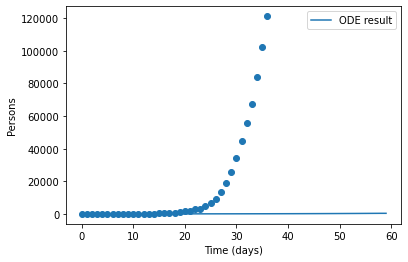

In [236]:
UCSDESRI123


#us_death = [0., 0., 0., 0., 1., 3., 8., 10., 13., 16., 17., 18., 23., 24., 26., 31., 39., 41., 51., 61., 73., 99., 122., 153., 209., 276., 349., 471., 599., 803., 1061., 1318., 1720., 2202., 2578., 3186., 4090.]

def sim_fun_ODE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      S[l] = S[l] - beta*I[l]/N*S[l]*dt
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt
    S[l+1] = S[l]
    I[l+1] = I[l]
  return S, I

def sim_fun_SDE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      noise_matrix = np.matrix([[beta*I[l]*S[l]/N,-beta*I[l]*S[l]/N],[-beta*I[l]*S[l]/N, beta*I[l]*S[l]/N + I[l]/D]])
      normal_noise = np.matmul(la.sqrtm(noise_matrix), np.random.normal((1,2)))
      S[l] = S[l] - beta*I[l]/N*S[l]*dt + np.sqrt(dt)*normal_noise[0]
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt + np.sqrt(dt)*normal_noise[1]
    S[l+1] = S[l]
    I[l+1] = I[l]
    return S, I
length = 60

beta = 0.0609266174999754
D = 145.8343055068469
N = p    # population size

int_steps = 20
plt.scatter(y=i,x=range(0,len(i),1))
S_ODE, I_ODE = sim_fun_ODE(s,i,beta, N, D, int_steps, length)
S_SDE, I_SDE = sim_fun_SDE(s,i,beta, N, D, int_steps, length)
plt.plot(I_ODE,label='ODE result')
#plt.plot(I_SDE,label='SDE result')

plt.xlabel('Time (days)')
plt.ylabel('Persons')
plt.legend()


##beta = 0.3                  # infection rate
#D = 7                   # average duration of the infection
#N = 300000000.0/10000.0     # population size


plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

overflow encountered in double_scalars

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

invalid value encountered in double_scalars



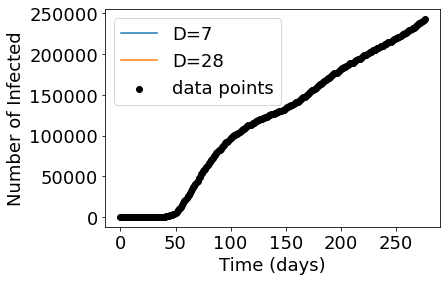

<Figure size 432x288 with 0 Axes>

In [240]:


# simulations of the ODE/SDE SIR model:
length = 150
int_steps = 20
N = 300000000.0/10000.0     # population size

# D = 5.0                    # average duration of the infection
D = 7.0*0.7                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_5, I_ODE_5 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

D = 7.0                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_7, I_ODE_7 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

# D = 10.0                    # average duration of the infection
D = 7.0*1.2                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_10, I_ODE_10 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)


D = 1.0/( 1.0/(7.0*0.7) - 1.0/7.0 + 1.0/28.0 )                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_20, I_ODE_20 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

D = 28.0                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_28, I_ODE_28 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

D = 1.0/( 1.0/28.0-1.0/7.0+1.0/(7.0*1.2) )                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_30, I_ODE_30 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)


fig, ax = plt.subplots()
x= np.linspace(1.0, 150.0, 150)
ax.plot(x, I_ODE_7, label='D=7')
ax.plot(x, I_ODE_28, label='D=28')
ax.scatter(range(0,len(us_death)-19,1), us_death[19:], color = 'black', marker = 'o', label='data points')
ax.fill_between(x, I_ODE_5, I_ODE_10, color='b', alpha=0.1)
ax.fill_between(x, I_ODE_20, I_ODE_30, color='r', alpha=0.1)
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Number of Infected', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.savefig("epi_comp.eps")